# **NBA Most Improved Player/Most Valuable Player Predictor**
---


# **Data Science Final Portfolio**
*By* **Gabriel Epstein** *and* **Patrick Callahan**

**Project Websites**

[Final Portfolio GitHub Repository](https://github.com/GabrielEpstein/DataScienceFinalPortfolio)

[Final Portfolio Project Planning](https://github.com/users/GabrielEpstein/projects/6)

[Final Portfolio Website (Hosted by GitHub Pages)](https://gabrielepstein.github.io/DataScienceFinalPortfolio/)

## **Project Background, Logistics, Goals, and Data**

**Motivation:** This project is our Final Project Portfolio for the Intro To Data Science Course (CMPS-3160) at Tulane University.


**Project Idea / Plan:** Stats tell a story. The NBA MVP award (like the MIP award) is selected based on the subjective opinion of broadcasters, announcers, sports journalists, etc. These people each get to cast votes (1st place, 2nd place, and 3rd place votes are all worth a different amount of points, 1st being worth the most) for who they believe is the MVP. The player with the highest share of votes is the winner. The equation for this is as follows:

$\text{Share} = \frac{\text{MVP Voting Points}}{ \text{Total Possible MVP Points}}$

We want to discover if we can predict the Most Valuable or Improved Player through data analytics, or if there are chapters missing from that story.

The data below incorporates many advanced statistics, including play by play information for every player, season wide basic statistics, statistics per 100 possessions, and more. We believe we can use a combination of this data to create a model that can determine the upcoming NBA MVP.

**Project Goal:** Our goal is to develop a predictive model that accurately anticipates the next NBA MVP based on a variety of metrics including historical performance data and individual statistics, to uncover the most influential factors contributing to MVP recognition by conducting in-depth analyses of individual and team statistics and to test the model against historical MVP outcomes to assess its performance through cross-validation techniques.

**Collaboration Plan**

Our plan is to meet once a week, whether it's after class or on Zoom. We have a  [GitHub Repository](https://github.com/GabrielEpstein/DataScienceFinalPortfolio) with a [project timeline](https://github.com/users/GabrielEpstein/projects/6) and a shared Google Colab Notebook to work on the project. We will meet to discuss our progress and the direction we are heading, and work on our assigned tasks individually, collaborating with eachother when necessary and keeping eachother informed on our current goal.

**Relevant Links:**

*NBA Stat FAQ to help identify statistics used and discrepencies in statistics tracked*

[FAQ | Stats | NBA.com](https://www.nba.com/stats/help/faq)

*The following data is used in Milestone 1*

We downloaded the following dataset and its accompanying .csv files to upload to Google Drive for access in our ETL:

[NBA Stats (1947-Present)](https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats/data)

*The following data may be used in Milestone 2 and beyond*


[NBA Database](https://www.kaggle.com/datasets/wyattowalsh/basketball)


#**Extraction, Transformation, and Loading!**

Our project begins with ETL.

Below, we are mounting Google Drive, importing libraries, and importing data to be used for Milestone 1.

**Mounting Google Drive**


In [1]:
# Mounting my google drive for access to the datasets
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Intro to Data Science/Data Science Final Portfolio

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Intro to Data Science/Data Science Final Portfolio


**Importing Libraries:** Below, we are importing some of the libraries we will be using to analyze this data in Jupyter Notebooks. So far, I am using Pandas and NumPy libraries, and will be using MatLab's Plotting Library as well as Seaborn.

In [2]:
# Importing different libraries for use in analysis
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", None, "display.max_columns", None, 'max_colwidth', None)

 **Importing Data:** Here, we are importing some data from the first dataset to use that we found from [Kaggle](https://kaggle.com), the "world's largest data science community with powerful tools and resources to help you achieve your data science goals." Then we use the .head() function to visually verify that the dataset seems to have been imported without problems!

*About the Data:* This data is from the 'Player Shooting' csv. It contains stats by player and season pretaining to individual players shooting statistics, including their field goal percentage, the average distance of their field goals, their field goal attempts and percentages by distance, and more.


In [3]:
#Reading two of the csv files and displaying the first five rows with .head()
player_shooting_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intro to Data Science/Data Science Final Portfolio/Data Sets/NBA Stats (1947-Present)/Player Shooting.csv')
player_per_game_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intro to Data Science/Data Science Final Portfolio/Data Sets/NBA Stats (1947-Present)/Player Per Game.csv')
player_shooting_df.head()


,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,mp,fg_percent,avg_dist_fga,percent_fga_from_x2p_range,percent_fga_from_x0_3_range,percent_fga_from_x3_10_range,percent_fga_from_x10_16_range,percent_fga_from_x16_3p_range,percent_fga_from_x3p_range,fg_percent_from_x2p_range,fg_percent_from_x0_3_range,fg_percent_from_x3_10_range,fg_percent_from_x10_16_range,fg_percent_from_x16_3p_range,fg_percent_from_x3p_range,percent_assisted_x2p_fg,percent_assisted_x3p_fg,percent_dunks_of_fga,num_of_dunks,percent_corner_3s_of_3pa,corner_3_point_percent,num_heaves_attempted,num_heaves_made
0,31136,2024,5025,A.J. Green,NaN,SG,24,2,NBA,MIL,39,357,0.438,24.0,0.133,0.023,0.023,0.023,0.063,0.867,0.529,1.000,0.333,0.333,0.500,0.423,1.000,0.915,0.000,0,0.216,0.542,0,0
1,31137,2024,5026,A.J. Lawson,NaN,SG,23,2,NBA,DAL,28,231,0.471,12.7,0.529,0.329,0.188,0.012,0.000,0.471,0.600,0.857,0.188,0.000,NaN,0.325,0.519,1.000,0.129,10,0.650,0.308,0,0
2,31138,2024,5027,AJ Griffin,NaN,SF,20,2,NBA,ATL,18,132,0.289,21.3,0.267,0.044,0.111,0.044,0.067,0.733,0.333,1.000,0.200,0.000,0.333,0.273,0.750,0.889,0.022,1,0.242,0.250,0,0
3,31139,2024,4219,Aaron Gordon,NaN,PF,28,10,NBA,DEN,54,1699,0.557,7.4,0.814,0.537,0.203,0.053,0.021,0.186,0.618,0.758,0.380,0.214,0.364,0.293,0.644,0.793,0.262,128,0.364,0.389,1,0
4,31140,2024,4582,Aaron Holiday,NaN,PG,27,6,NBA,HOU,56,967,0.455,17.4,0.465,0.132,0.168,0.119,0.045,0.535,0.507,0.634,0.462,0.514,0.286,0.410,0.274,0.838,0.006,2,0.229,0.447,1,0


In [4]:
# Displaying the second dataframe
player_per_game_df.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,x2p_percent,e_fg_percent,ft_per_game,fta_per_game,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,31136,2024,5025,A.J. Green,NaN,SG,24.0,2,NBA,MIL,39,0.0,9.2,1.4,3.3,0.438,1.2,2.8,0.423,0.2,0.4,0.529,0.621,0.2,0.2,1.000,0.2,0.9,1.0,0.5,0.1,0.1,0.1,0.9,4.3
1,31137,2024,5026,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,28,0.0,8.3,1.4,3.0,0.471,0.5,1.4,0.325,1.0,1.6,0.600,0.547,0.4,0.7,0.632,0.4,0.8,1.2,0.5,0.3,0.1,0.4,0.7,3.8
2,31138,2024,5027,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,18,0.0,7.3,0.7,2.5,0.289,0.5,1.8,0.273,0.2,0.7,0.333,0.389,0.1,0.1,1.000,0.1,0.7,0.8,0.2,0.1,0.1,0.3,0.3,2.1
3,31139,2024,4219,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,54,54.0,31.5,5.5,9.8,0.557,0.5,1.8,0.293,4.9,8.0,0.618,0.585,2.4,3.7,0.652,2.4,4.1,6.5,3.2,0.9,0.7,1.5,1.9,13.9
4,31140,2024,4582,Aaron Holiday,NaN,PG,27.0,6,NBA,HOU,56,1.0,17.3,2.5,5.5,0.455,1.2,3.0,0.410,1.3,2.6,0.507,0.565,0.7,0.8,0.889,0.3,1.4,1.7,1.8,0.5,0.1,0.8,1.6,7.0


## Data Cleanup

It's always important to maintain tidy data! 🧹💨

### Cleaning player_shooting_df
Let's start with the player_shooting_df. We will identify the unique columns in the data, checking the dtypes, checking for NaNs, and filling in some missing data.

In [5]:
#See unique column names
player_shooting_df.columns.unique()

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'mp', 'fg_percent', 'avg_dist_fga',
       'percent_fga_from_x2p_range', 'percent_fga_from_x0_3_range',
       'percent_fga_from_x3_10_range', 'percent_fga_from_x10_16_range',
       'percent_fga_from_x16_3p_range', 'percent_fga_from_x3p_range',
       'fg_percent_from_x2p_range', 'fg_percent_from_x0_3_range',
       'fg_percent_from_x3_10_range', 'fg_percent_from_x10_16_range',
       'fg_percent_from_x16_3p_range', 'fg_percent_from_x3p_range',
       'percent_assisted_x2p_fg', 'percent_assisted_x3p_fg',
       'percent_dunks_of_fga', 'num_of_dunks', 'percent_corner_3s_of_3pa',
       'corner_3_point_percent', 'num_heaves_attempted', 'num_heaves_made'],
      dtype='object')

In [6]:
# Checking the dtypes of the different columns
player_shooting_df.dtypes

seas_id                            int64
season                             int64
player_id                          int64
player                            object
birth_year                       float64
pos                               object
age                                int64
experience                         int64
lg                                object
tm                                object
g                                  int64
mp                                 int64
fg_percent                       float64
avg_dist_fga                     float64
percent_fga_from_x2p_range       float64
percent_fga_from_x0_3_range      float64
percent_fga_from_x3_10_range     float64
percent_fga_from_x10_16_range    float64
percent_fga_from_x16_3p_range    float64
percent_fga_from_x3p_range       float64
fg_percent_from_x2p_range        float64
fg_percent_from_x0_3_range       float64
fg_percent_from_x3_10_range      float64
fg_percent_from_x10_16_range     float64
fg_percent_from_

In [7]:
# Checking for NaNs
player_shooting_df.isnull().sum()

seas_id                              0
season                               0
player_id                            0
player                               0
birth_year                       16531
pos                                  0
age                                  0
experience                           0
lg                                   0
tm                                   0
g                                    0
mp                                   0
fg_percent                         109
avg_dist_fga                       109
percent_fga_from_x2p_range         109
percent_fga_from_x0_3_range        109
percent_fga_from_x3_10_range       109
percent_fga_from_x10_16_range      109
percent_fga_from_x16_3p_range      109
percent_fga_from_x3p_range         109
fg_percent_from_x2p_range          190
fg_percent_from_x0_3_range         578
fg_percent_from_x3_10_range        920
fg_percent_from_x10_16_range      1345
fg_percent_from_x16_3p_range      1481
fg_percent_from_x3p_range

Since we are missing a lot of birth years but no ages, we will drop the 'birth_year' column using the Pandas .drop() function



In [8]:
# Using the .drop() function and specifying inplace = True to make the changes permanent within the dataframe.
player_shooting_df.drop(columns = 'birth_year', inplace = True)
player_shooting_df.head()

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,mp,fg_percent,avg_dist_fga,percent_fga_from_x2p_range,percent_fga_from_x0_3_range,percent_fga_from_x3_10_range,percent_fga_from_x10_16_range,percent_fga_from_x16_3p_range,percent_fga_from_x3p_range,fg_percent_from_x2p_range,fg_percent_from_x0_3_range,fg_percent_from_x3_10_range,fg_percent_from_x10_16_range,fg_percent_from_x16_3p_range,fg_percent_from_x3p_range,percent_assisted_x2p_fg,percent_assisted_x3p_fg,percent_dunks_of_fga,num_of_dunks,percent_corner_3s_of_3pa,corner_3_point_percent,num_heaves_attempted,num_heaves_made
0,31136,2024,5025,A.J. Green,SG,24,2,NBA,MIL,39,357,0.438,24.0,0.133,0.023,0.023,0.023,0.063,0.867,0.529,1.000,0.333,0.333,0.500,0.423,1.000,0.915,0.000,0,0.216,0.542,0,0
1,31137,2024,5026,A.J. Lawson,SG,23,2,NBA,DAL,28,231,0.471,12.7,0.529,0.329,0.188,0.012,0.000,0.471,0.600,0.857,0.188,0.000,NaN,0.325,0.519,1.000,0.129,10,0.650,0.308,0,0
2,31138,2024,5027,AJ Griffin,SF,20,2,NBA,ATL,18,132,0.289,21.3,0.267,0.044,0.111,0.044,0.067,0.733,0.333,1.000,0.200,0.000,0.333,0.273,0.750,0.889,0.022,1,0.242,0.250,0,0
3,31139,2024,4219,Aaron Gordon,PF,28,10,NBA,DEN,54,1699,0.557,7.4,0.814,0.537,0.203,0.053,0.021,0.186,0.618,0.758,0.380,0.214,0.364,0.293,0.644,0.793,0.262,128,0.364,0.389,1,0
4,31140,2024,4582,Aaron Holiday,PG,27,6,NBA,HOU,56,967,0.455,17.4,0.465,0.132,0.168,0.119,0.045,0.535,0.507,0.634,0.462,0.514,0.286,0.410,0.274,0.838,0.006,2,0.229,0.447,1,0


*Challenge:* It appears that there is a discrepancy between the number of players who did not attempt any field goals within a two-point range, and the number of players with NaN values for their field goal percentage from two-point range. To address this, we will conditionally replace values of NaN with 0 for players who did attempt two-point range shots but are missing percentages for two-point range shots.

(This is something we will have to address when doing statistical analysis later on, as we will have to decide whether to include players who have not take certain types of shot from that analysis so as to avoid skewing the data by filling NaNs with 0s.)

In [9]:
# Here we will attempt to minimize the discrepancy of NaN and 0 percentages for two-point shot attempts

# Define the columns which indicate percentage of field goals attempted from two-point ranges and three-point range
attempt_columns = [
    'percent_fga_from_x2p_range',
    'percent_fga_from_x0_3_range',
    'percent_fga_from_x3_10_range',
    'percent_fga_from_x10_16_range',
    'percent_fga_from_x16_3p_range',
    'percent_fga_from_x3p_range'
]

# Define the corresponding shooting percentage columns
percent_columns = [
    'fg_percent_from_x2p_range',
    'fg_percent_from_x0_3_range',
    'fg_percent_from_x3_10_range',
    'fg_percent_from_x10_16_range',
    'fg_percent_from_x16_3p_range',
    'fg_percent_from_x3p_range'
]

# Create a copy of the dataframe for the relevant columns before replacement
before_replacement = player_shooting_df[attempt_columns + percent_columns].copy()

# Apply conditional logic to fill NaNs where attempt percentage >= 0
for attempt_col, percent_col in zip(attempt_columns, percent_columns):

    # Replace NaNs with 0 in the shooting percentage column where attempt percentage is >= 0
    player_shooting_df.loc[player_shooting_df[attempt_col] >= 0, percent_col] = player_shooting_df.loc[player_shooting_df[attempt_col] >= 0, percent_col].fillna(0)

# After replacements - check for differences
after_replacement = player_shooting_df[attempt_columns + percent_columns]

# Check if there are rows with attempt percentage >= 0 but corresponding shooting percentage is NaN after the operation
for attempt_col, percent_col in zip(attempt_columns, percent_columns):
    condition = (after_replacement[attempt_col] >= 0) & (after_replacement[percent_col].isnull())
    if condition.any():
        print(f"Rows with non-negative attempts in {attempt_col} but NaN in {percent_col} after replacement:")
        print(after_replacement[condition][[attempt_col, percent_col]])
    else:
        print(f"No discrepancies found in {attempt_col} and {percent_col} after replacement.")

No discrepancies found in percent_fga_from_x2p_range and fg_percent_from_x2p_range after replacement.
No discrepancies found in percent_fga_from_x0_3_range and fg_percent_from_x0_3_range after replacement.
No discrepancies found in percent_fga_from_x3_10_range and fg_percent_from_x3_10_range after replacement.
No discrepancies found in percent_fga_from_x10_16_range and fg_percent_from_x10_16_range after replacement.
No discrepancies found in percent_fga_from_x16_3p_range and fg_percent_from_x16_3p_range after replacement.
No discrepancies found in percent_fga_from_x3p_range and fg_percent_from_x3p_range after replacement.


It appears we will have to work on cleaning up this data some more another time. This will likely involve manually sifting through the csv file to check what is happening with NaNs to see how we should appropriately handle them!

### Cleaning player_per_game_df
Now let's do some cleaning for our player_per_game_df. We will do the same process that we did for player_shooting_df.

In [10]:
#See unique column names
player_per_game_df.columns.unique()

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp_per_game', 'fg_per_game',
       'fga_per_game', 'fg_percent', 'x3p_per_game', 'x3pa_per_game',
       'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent',
       'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game'],
      dtype='object')

In [11]:
# Checking the dtypes of the different columns
player_per_game_df.dtypes

seas_id            int64
season             int64
player_id          int64
player            object
birth_year       float64
pos               object
age              float64
experience         int64
lg                object
tm                object
g                  int64
gs               float64
mp_per_game      float64
fg_per_game      float64
fga_per_game     float64
fg_percent       float64
x3p_per_game     float64
x3pa_per_game    float64
x3p_percent      float64
x2p_per_game     float64
x2pa_per_game    float64
x2p_percent      float64
e_fg_percent     float64
ft_per_game      float64
fta_per_game     float64
ft_percent       float64
orb_per_game     float64
drb_per_game     float64
trb_per_game     float64
ast_per_game     float64
stl_per_game     float64
blk_per_game     float64
tov_per_game     float64
pf_per_game      float64
pts_per_game     float64
dtype: object

In [12]:
# Checking for NaNs
player_per_game_df.isnull().sum()

seas_id              0
season               0
player_id            0
player               0
birth_year       28944
pos                  0
age                 22
experience           0
lg                   0
tm                   0
g                    0
gs                8637
mp_per_game       1083
fg_per_game          0
fga_per_game         0
fg_percent         163
x3p_per_game      6352
x3pa_per_game     6352
x3p_percent      10545
x2p_per_game         0
x2pa_per_game        0
x2p_percent        250
e_fg_percent       163
ft_per_game          0
fta_per_game         0
ft_percent        1303
orb_per_game      4657
drb_per_game      4657
trb_per_game       894
ast_per_game         0
stl_per_game      5626
blk_per_game      5625
tov_per_game      5635
pf_per_game          0
pts_per_game         0
dtype: int64

In [13]:
# Using the .drop() function and specifying inplace = True to make the changes permanent within the dataframe.
player_per_game_df.drop(columns = 'birth_year', inplace = True)
player_per_game_df.head()

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,x2p_percent,e_fg_percent,ft_per_game,fta_per_game,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,31136,2024,5025,A.J. Green,SG,24.0,2,NBA,MIL,39,0.0,9.2,1.4,3.3,0.438,1.2,2.8,0.423,0.2,0.4,0.529,0.621,0.2,0.2,1.000,0.2,0.9,1.0,0.5,0.1,0.1,0.1,0.9,4.3
1,31137,2024,5026,A.J. Lawson,SG,23.0,2,NBA,DAL,28,0.0,8.3,1.4,3.0,0.471,0.5,1.4,0.325,1.0,1.6,0.600,0.547,0.4,0.7,0.632,0.4,0.8,1.2,0.5,0.3,0.1,0.4,0.7,3.8
2,31138,2024,5027,AJ Griffin,SF,20.0,2,NBA,ATL,18,0.0,7.3,0.7,2.5,0.289,0.5,1.8,0.273,0.2,0.7,0.333,0.389,0.1,0.1,1.000,0.1,0.7,0.8,0.2,0.1,0.1,0.3,0.3,2.1
3,31139,2024,4219,Aaron Gordon,PF,28.0,10,NBA,DEN,54,54.0,31.5,5.5,9.8,0.557,0.5,1.8,0.293,4.9,8.0,0.618,0.585,2.4,3.7,0.652,2.4,4.1,6.5,3.2,0.9,0.7,1.5,1.9,13.9
4,31140,2024,4582,Aaron Holiday,PG,27.0,6,NBA,HOU,56,1.0,17.3,2.5,5.5,0.455,1.2,3.0,0.410,1.3,2.6,0.507,0.565,0.7,0.8,0.889,0.3,1.4,1.7,1.8,0.5,0.1,0.8,1.6,7.0


Let's see where the NaN values for age are.

In [14]:
# Filtering the dataframe for rows where the 'age' column is NaN
ppg_nan_age_df = player_per_game_df[player_per_game_df['age'].isnull()]
ppg_nan_age_df.head(30)

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,x2p_percent,e_fg_percent,ft_per_game,fta_per_game,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
26500,5554,1973,1470,Pete Smith,PF,NaN,1,ABA,SDA,5,NaN,6.4,0.4,2.4,0.167,0.0,0.4,0.0,0.4,2.0,0.200,0.167,0.0,0.0,NaN,0.6,1.0,1.6,0.2,NaN,NaN,1.0,1.0,0.8
27132,4391,1971,1253,Clarence Brookins,F,NaN,1,ABA,FLO,8,NaN,7.4,1.0,3.3,0.308,0.0,0.1,0.0,1.0,3.1,0.320,0.308,0.6,1.5,0.417,1.0,0.5,1.5,0.1,NaN,NaN,0.0,0.6,2.6
27286,4545,1971,1291,Jim Wilson,G,NaN,1,ABA,PTC,6,NaN,7.3,0.2,1.3,0.125,0.0,0.0,NaN,0.2,1.3,0.125,0.125,0.7,1.0,0.667,0.2,0.8,1.0,1.3,NaN,NaN,0.8,0.5,1.0
27888,4293,1970,1231,Walter Byrd,PF,NaN,1,ABA,MMF,22,NaN,5.0,0.6,2.0,0.326,0.0,0.0,0.0,0.6,1.9,0.333,0.326,0.2,0.8,0.294,0.4,0.8,1.1,0.3,NaN,NaN,0.4,1.0,1.5
27899,4304,1970,1233,Wilbur Kirkland,F,NaN,1,ABA,PTP,2,NaN,13.5,1.5,3.5,0.429,0.0,0.0,NaN,1.5,3.5,0.429,0.429,0.0,0.0,NaN,0.5,5.0,5.5,0.5,NaN,NaN,1.0,2.5,3.0
27972,3550,1969,1081,Charles Parks,F,NaN,1,ABA,DNR,2,NaN,2.5,0.0,0.5,0.000,0.0,0.0,NaN,0.0,0.5,0.000,0.000,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.5,0.0
28349,3141,1968,904,Bill Allen,C,NaN,1,ABA,ANA,38,NaN,22.6,3.2,7.4,0.429,0.1,0.1,1.0,3.1,7.3,0.424,0.432,1.5,2.6,0.586,NaN,NaN,7.1,0.6,NaN,NaN,1.0,3.2,7.9
28378,3170,1968,922,Bobby Wilson,PF,NaN,1,ABA,DLC,69,NaN,22.6,3.3,8.4,0.389,0.0,0.0,0.5,3.3,8.4,0.389,0.390,2.4,3.8,0.615,NaN,NaN,6.5,0.8,NaN,NaN,1.8,3.0,8.9
28404,3196,1968,939,Darrell Hardy,F,NaN,1,ABA,HSM,17,NaN,10.1,1.9,4.4,0.432,0.0,0.1,0.0,1.9,4.3,0.438,0.432,1.5,2.1,0.714,NaN,NaN,3.3,0.5,NaN,NaN,0.7,1.4,5.2
28414,3206,1968,945,Dexter Westbrook,F,NaN,1,ABA,TOT,12,NaN,10.6,1.6,3.3,0.487,0.0,0.0,NaN,1.6,3.3,0.487,0.487,0.8,1.2,0.714,NaN,NaN,1.9,0.4,NaN,NaN,1.1,2.5,4.0


Looks like all of the NaN values are from players in the ABA, an older, short lived league (American Basketball Association) that ended up merging with the NBA in 1979. Since we are looking at the NBA for this project, let's drop all the entries that are not in the NBA from this csv!

In [15]:
# Filter the dataframe to keep only rows where 'lg' is 'NBA', overwriting the original DataFrame
player_per_game_df = player_per_game_df[player_per_game_df['lg'] == 'NBA']

# Now player_per_game_df contains only entries from the NBA
(player_per_game_df['lg']!='NBA').sum()

0

Great! Now let's do the same thing for the player_shooting_df, since we didn't think of doing it before, then we'll get back to cleaning our player_per_game_df.

In [16]:
# Filter the dataframe to keep only rows where 'lg' is 'NBA', overwriting the original DataFrame
player_shooting_df = player_shooting_df[player_shooting_df['lg'] == 'NBA']

# Now player_per_game_df contains only entries from the NBA
(player_shooting_df['lg']!='NBA').sum()

0

Let's check the NaNs of our updated dataframes.

In [17]:
player_per_game_df.isnull().sum()

seas_id             0
season              0
player_id           0
player              0
pos                 0
age                 0
experience          0
lg                  0
tm                  0
g                   0
gs               6417
mp_per_game       501
fg_per_game         0
fga_per_game        0
fg_percent        146
x3p_per_game     5770
x3pa_per_game    5770
x3p_percent      9621
x2p_per_game        0
x2pa_per_game       0
x2p_percent       233
e_fg_percent      146
ft_per_game         0
fta_per_game        0
ft_percent       1228
orb_per_game     3900
drb_per_game     3900
trb_per_game      312
ast_per_game        0
stl_per_game     3900
blk_per_game     3900
tov_per_game     5052
pf_per_game         0
pts_per_game        0
dtype: int64

No missing games (g), but 6,417 missing games started (gs). Is this a result of these players not playing in games (in which case, filling gs with 0 would be more appropriate) or is there missing data? Let's investigate.

In [18]:
# Filter the dataframe for rows where 'gs' is NaN but 'g' is greater than 0
missing_gs_played_games = player_per_game_df[(player_per_game_df['gs'].isnull()) & (player_per_game_df['g'] > 0)]

# Display the first few rows of this filtered dataframe to investigate
print(missing_gs_played_games[['player', 'g', 'gs']].head(20))

                player   g  gs
23104    Abdul Jeelani  66 NaN
23105   Adrian Dantley  80 NaN
23106       Alan Hardy  22 NaN
23107     Alex English  81 NaN
23108    Allan Bristow  82 NaN
23109    Allen Leavell  79 NaN
23110      Alvan Adams  75 NaN
23111      Alvin Scott  82 NaN
23112   Andre McCarter  43 NaN
23114  Anthony Roberts  26 NaN
23115      Armond Hill  75 NaN
23116      Armond Hill  24 NaN
23117      Armond Hill  51 NaN
23118      Art Collins  29 NaN
23119    Artis Gilmore  82 NaN
23120      Austin Carr  47 NaN
23121      Austin Carr   8 NaN
23122      Austin Carr  39 NaN
23123     Ben Poquette  82 NaN
23124     Bernard King  81 NaN


In [19]:
missing_gs_played_games.loc[23104]

seas_id                   8348
season                    1981
player_id                 1845
player           Abdul Jeelani
pos                         SF
age                       26.0
experience                   2
lg                         NBA
tm                         DAL
g                           66
gs                         NaN
mp_per_game               16.8
fg_per_game                2.8
fga_per_game               6.7
fg_percent               0.425
x3p_per_game               0.0
x3pa_per_game              0.0
x3p_percent                0.0
x2p_per_game               2.8
x2pa_per_game              6.7
x2p_percent              0.426
e_fg_percent             0.425
ft_per_game                2.7
fta_per_game               3.3
ft_percent               0.814
orb_per_game               1.3
drb_per_game               2.2
trb_per_game               3.5
ast_per_game               1.0
stl_per_game               0.7
blk_per_game               0.5
tov_per_game               1.3
pf_per_g

According to [FAQ | Stats | NBA.com](https://www.nba.com/stats/help/faq), certain stats were not tracked until later on in the league's history. There also seem to be some missing values, even after these stats were tracked. For example, Abdul Jeelani does not have any data pertaining to games started in 1981, even though the league began tracking games started in 1971. We will have to decide how to address this later on when doing deeper analytics.

Next, we will move onto EDA.

# **Exploratory Data Analysis**

In this section, we will do some light EDA on our data showing 3 - 5 interesting summary statistics, a graphic showing an interesting property or distribution in the data and explaining their relevance to our question / investigation.

## Summary Statistics

Let's look at some basic summary statistics.

In [20]:
# Let's look at the average percentage of field goal attempts from 3-point range
player_shooting_df['percent_fga_from_x3p_range'].mean()

0.26173929001203367

This is an interesting statistic (the average percentage of field goal attempts from 3-point range) in terms of league wide MVPs. For context, there have been 14 back-to-back league MVPs (by 12 players), and 3 back-to-back-to-back MVPs (MVP 3 years in a row) in league history. Looking at recent years, there have been 3 back-to-back MVPs, including Stephen Curry who won back-to-back MVPs in the 2014-2015 and 2015-2016 seasons. Stephen Curry is notorious for changing the league with his 'lights-out' 3-point shooting, landing him the first (and only) unanimous MVP in league history. Could this be indicative of 3-point shooting being a key factor in league MVP?

In [21]:
# Let's see Steph Curry's shooting from the 2015-2016 season (his unanimous MVP season).
player_shooting_df[(player_shooting_df['player'] == 'Stephen Curry') & (player_shooting_df['season'] == 2016)][['percent_fga_from_x3p_range', 'fg_percent_from_x3p_range']]

,percent_fga_from_x3p_range,fg_percent_from_x3p_range
6006,0.554,0.454


As you can see, the first and only unanimous NBA MVP took 55.4% of all of his shots that season from the 3-point range, and was shooting 45.4% from 3-point range. How does this compare to the other two recent back-to-back league MVPs? Those two players would be Giannis Antentekounmpo and Nikola Jokic. Giannis Antetokounmpo won back-to-back MVP awards in the 2018-2019 and 2019-2020 Seasons. Nikola Jokić won back-to-back MVP awards in 2020-2021 and 2021-2022.

In [22]:
# Let's filter for each player and their MVP seasons
curry_stats = player_shooting_df[
    (player_shooting_df['player'] == 'Stephen Curry') &
    ((player_shooting_df['season'] == 2015) | (player_shooting_df['season'] == 2016))][['player', 'season', 'percent_fga_from_x3p_range', 'fg_percent_from_x3p_range']]

giannis_stats = player_shooting_df[
    (player_shooting_df['player'] == 'Giannis Antetokounmpo') &
    ((player_shooting_df['season'] == 2019) | (player_shooting_df['season'] == 2020))][['player', 'season', 'percent_fga_from_x3p_range', 'fg_percent_from_x3p_range']]

jokic_stats = player_shooting_df[
    (player_shooting_df['player'] == 'Nikola Jokić') &
    ((player_shooting_df['season'] == 2021) | (player_shooting_df['season'] == 2022))][['player', 'season', 'percent_fga_from_x3p_range', 'fg_percent_from_x3p_range']]

# Concatenating the dataframes for easy viewing
mvp_comparison = pd.concat([curry_stats, giannis_stats, jokic_stats])

# Resetting the index for better readability
mvp_comparison.reset_index(drop=True, inplace=True)

mvp_comparison

,player,season,percent_fga_from_x3p_range,fg_percent_from_x3p_range
0,Stephen Curry,2016,0.554,0.454
1,Stephen Curry,2015,0.482,0.443
2,Giannis Antetokounmpo,2020,0.237,0.304
3,Giannis Antetokounmpo,2019,0.163,0.256
4,Nikola Jokić,2022,0.220,0.337
5,Nikola Jokić,2021,0.183,0.388


Interesting, the two more recent back-to-back (though not unanimous) MVPs were not particularly frequent 3-point shooters!

Let's look at another summary statistic, this time from player_per_game_df.

In [23]:
# Looking at effective field goal percent, defined by the NBA as follows: "eFG% measures field goal percentage adjusting for the fact that a 3-point field goal is worth one more point than a 2-point field goal. The formula is eFG% = ((FGM + (0.5 * 3PM)) / FGA"
player_per_game_df['e_fg_percent'].mean()

0.45996369872317305

In [24]:
# Filter for Stephen Curry's back-to-back MVP seasons (2014-2015, 2015-2016)
curry_efg = player_per_game_df[
    (player_per_game_df['player'] == 'Stephen Curry') &
    ((player_per_game_df['season'] == 2015) | (player_per_game_df['season'] == 2016))
][['player', 'season', 'e_fg_percent']]

# Filter for Giannis Antetokounmpo's back-to-back MVP seasons (2018-2019, 2019-2020)
giannis_efg = player_per_game_df[
    (player_per_game_df['player'] == 'Giannis Antetokounmpo') &
    ((player_per_game_df['season'] == 2019) | (player_per_game_df['season'] == 2020))
][['player', 'season', 'e_fg_percent']]

# Filter for Nikola Jokić's back-to-back MVP seasons (2020-2021, 2021-2022)
jokic_efg = player_per_game_df[
    (player_per_game_df['player'] == 'Nikola Jokić') &
    ((player_per_game_df['season'] == 2021) | (player_per_game_df['season'] == 2022))
][['player', 'season', 'e_fg_percent']]

# Concatenate the filtered DataFrames
mvp_efg_comparison = pd.concat([curry_efg, giannis_efg, jokic_efg])

# Reset the index for better readability
mvp_efg_comparison.reset_index(drop=True, inplace=True)

mvp_efg_comparison


,player,season,e_fg_percent
0,Stephen Curry,2016,0.630
1,Stephen Curry,2015,0.594
2,Giannis Antetokounmpo,2020,0.589
3,Giannis Antetokounmpo,2019,0.599
4,Nikola Jokić,2022,0.620
5,Nikola Jokić,2021,0.602


Hmm, it seems that the 3 back-to-back MVPs have much more similar Effective Field Goal Percentages than 3-point statistics. They are all notably higher than the average across the dataset (roughtly 30% higher than the mean), and they are all within 4% of eachother!

Finally, let's look at a third statistic: field goal attempts per game.

In [25]:
# Filter for Stephen Curry's back-to-back MVP seasons (2014-2015, 2015-2016)
curry_fga = player_per_game_df[
    (player_per_game_df['player'] == 'Stephen Curry') &
    ((player_per_game_df['season'] == 2015) | (player_per_game_df['season'] == 2016))
][['player', 'season', 'fga_per_game']]

# Filter for Giannis Antetokounmpo's back-to-back MVP seasons (2018-2019, 2019-2020)
giannis_fga = player_per_game_df[
    (player_per_game_df['player'] == 'Giannis Antetokounmpo') &
    ((player_per_game_df['season'] == 2019) | (player_per_game_df['season'] == 2020))
][['player', 'season', 'fga_per_game']]

# Filter for Nikola Jokić's back-to-back MVP seasons (2020-2021, 2021-2022)
jokic_fga = player_per_game_df[
    (player_per_game_df['player'] == 'Nikola Jokić') &
    ((player_per_game_df['season'] == 2021) | (player_per_game_df['season'] == 2022))
][['player', 'season', 'fga_per_game']]

# Concatenate the filtered DataFrames
mvp_fga_comparison = pd.concat([curry_fga, giannis_fga, jokic_fga])

# Reset the index for better readability
mvp_fga_comparison.reset_index(drop=True, inplace=True)

mvp_fga_comparison


,player,season,fga_per_game
0,Stephen Curry,2016,20.2
1,Stephen Curry,2015,16.8
2,Giannis Antetokounmpo,2020,19.7
3,Giannis Antetokounmpo,2019,17.3
4,Nikola Jokić,2022,17.7
5,Nikola Jokić,2021,18.0


Can we now compare field goal attempts per game with effective field goal percent per game? Let's see below.

## Visualizations

Let's look at some of the data graphically

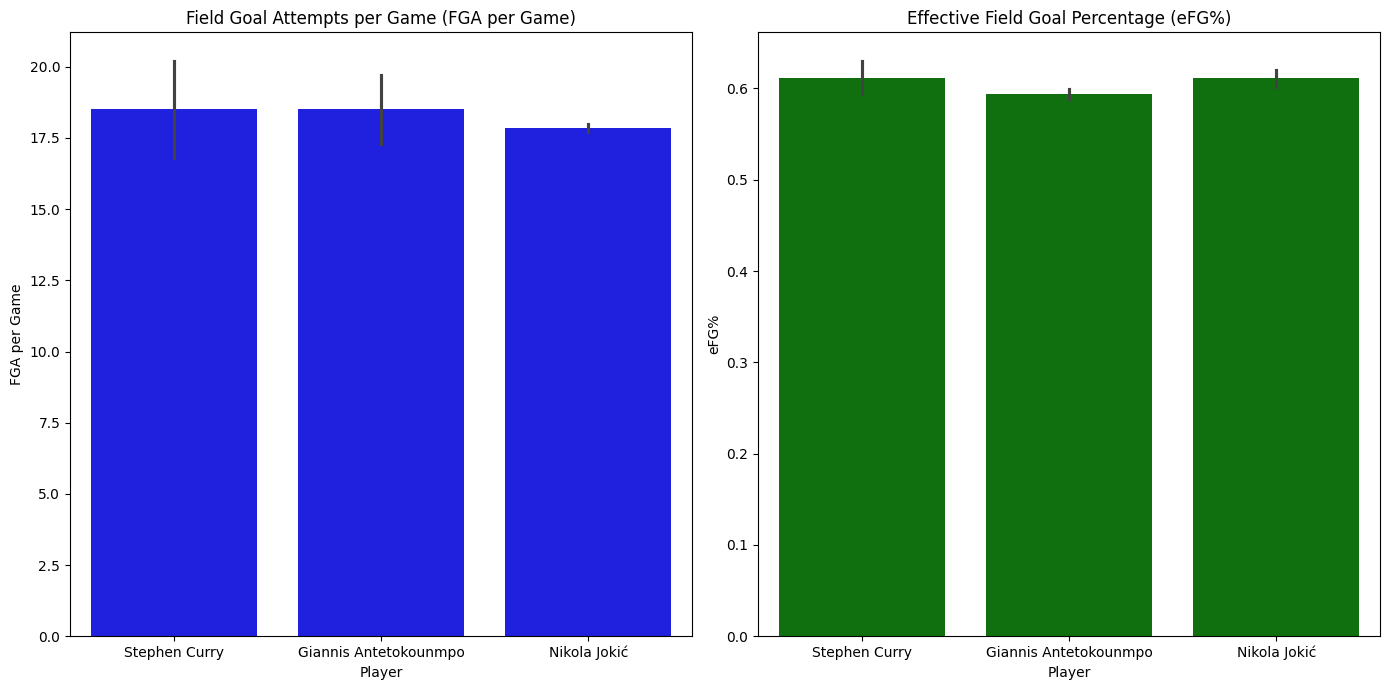

In [26]:
# Combine the two DataFrames on 'player' and 'season'
mvp_stats_comparison = pd.merge(mvp_efg_comparison, mvp_fga_comparison, on=['player', 'season'])

# Set up the matplotlib figure
plt.figure(figsize=(14, 7))

# Plot 1: FGA per game
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.barplot(data=mvp_stats_comparison, x='player', y='fga_per_game', color='blue')
plt.title('Field Goal Attempts per Game (FGA per Game)')
plt.xlabel('Player')
plt.ylabel('FGA per Game')

# Plot 2: eFG%
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.barplot(data=mvp_stats_comparison, x='player', y='e_fg_percent', color='green')
plt.title('Effective Field Goal Percentage (eFG%)')
plt.xlabel('Player')
plt.ylabel('eFG%')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

